### Machine Learning: Clasificacion --> Registro de votacion del congreso

Vamos a predecir a que partido pertenece cada congresista

In [28]:
#importamos la librerias que utilizaremos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Limpieza y transformaciones

In [2]:
#lista que permitira renombrar el nombre de cada una de las columnas
columnas = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration',
       'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports',
       'eaa_rsa']

In [3]:
#cargamos los datos
data = pd.read_csv("https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv", names=columnas)

In [4]:
data.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    object
 2   water              435 non-null    object
 3   budget             435 non-null    object
 4   physician          435 non-null    object
 5   salvador           435 non-null    object
 6   religious          435 non-null    object
 7   satellite          435 non-null    object
 8   aid                435 non-null    object
 9   missile            435 non-null    object
 10  immigration        435 non-null    object
 11  synfuels           435 non-null    object
 12  education          435 non-null    object
 13  superfund          435 non-null    object
 14  crime              435 non-null    object
 15  duty_free_exports  435 non-null    object
 16  eaa_rsa            435 non-null    object
dt

In [6]:
#reemplazamos los valores de n a 0 y y a 1
data.replace({'n': 0, 'y':1}, inplace=True)

In [7]:
data.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


se observa que existen valores con el caracter ? se podria tratar de registros en los que esas columnas no se les ingreso informacion, entonces llenaremos esos registros con nan y luego vamos analizar cuantos registros tienen valores vacios

In [8]:
data[data == '?'] = np.nan

In [9]:
data.isnull().sum()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

In [10]:
data.shape

(435, 17)

In [11]:
data_drop = data.dropna()

In [12]:
data_drop.shape

(232, 17)

al analizar observamos que no podemos eliminarlos, puesto a que al rededor de la mitad de nuestros datos son vacios y perderemos mucha informacion, para resolver esto utilizaremos un metodo de imputacion

In [13]:
from sklearn.impute import SimpleImputer

imputados = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")

In [14]:
nom_colum = data.drop("party", axis=1).columns
nom_colum

Index(['infants', 'water', 'budget', 'physician', 'salvador', 'religious',
       'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education',
       'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'],
      dtype='object')

In [15]:
for col in nom_colum:
    imp = imputados.fit(data[[col]])
    data[col] = imp.transform(data[[col]]).ravel()

In [16]:
data.isnull().sum()

party                0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
satellite            0
aid                  0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
duty_free_exports    0
eaa_rsa              0
dtype: int64

In [17]:
data.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [18]:
for col in nom_colum:
        data[col] = data[col].astype('int')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int32 
 2   water              435 non-null    int32 
 3   budget             435 non-null    int32 
 4   physician          435 non-null    int32 
 5   salvador           435 non-null    int32 
 6   religious          435 non-null    int32 
 7   satellite          435 non-null    int32 
 8   aid                435 non-null    int32 
 9   missile            435 non-null    int32 
 10  immigration        435 non-null    int32 
 11  synfuels           435 non-null    int32 
 12  education          435 non-null    int32 
 13  superfund          435 non-null    int32 
 14  crime              435 non-null    int32 
 15  duty_free_exports  435 non-null    int32 
 16  eaa_rsa            435 non-null    int32 
dt

In [20]:
data.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### EDA Simple

In [21]:
col_graf = columnas[1:]

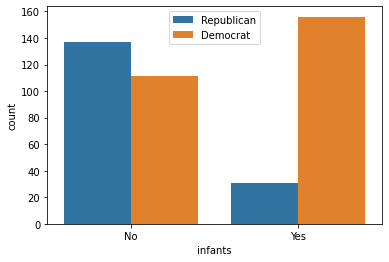

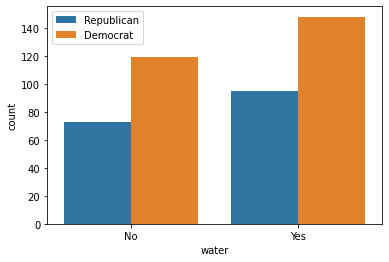

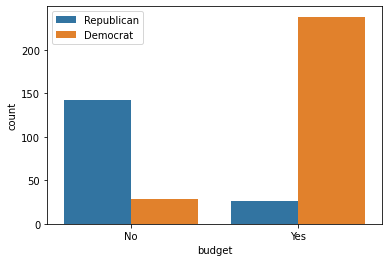

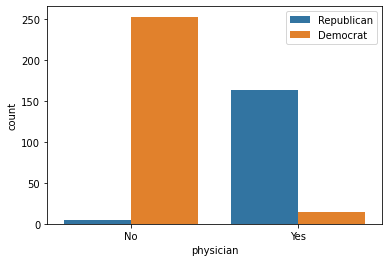

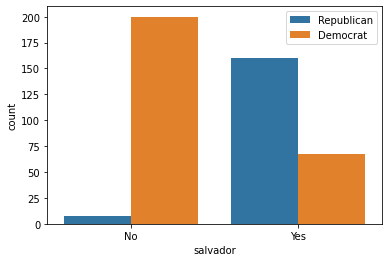

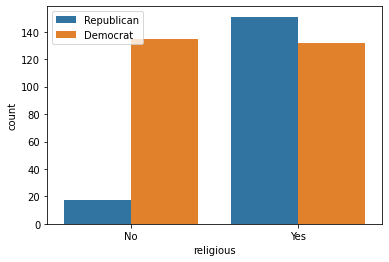

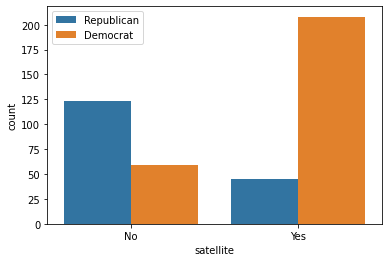

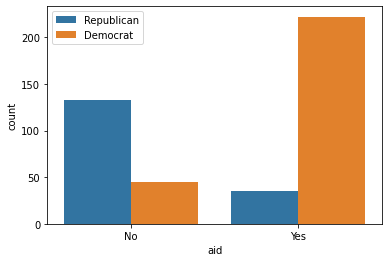

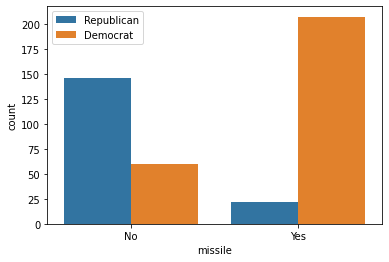

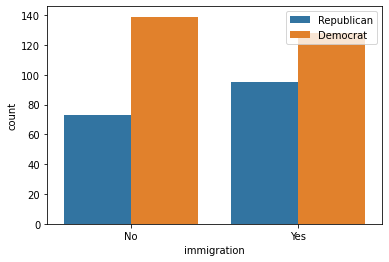

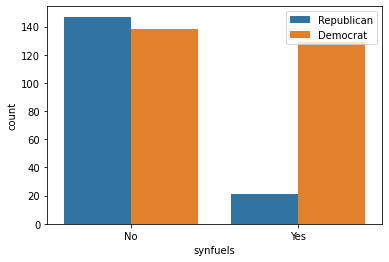

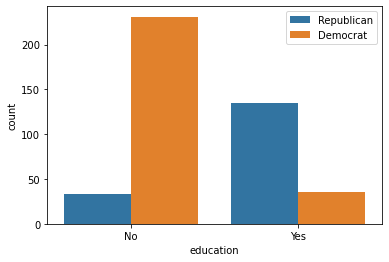

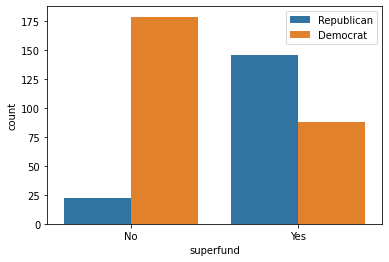

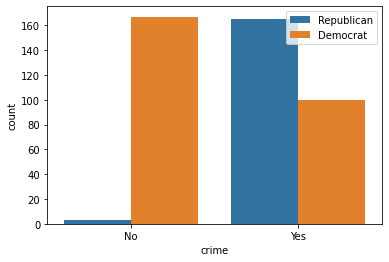

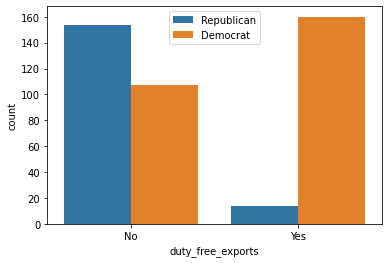

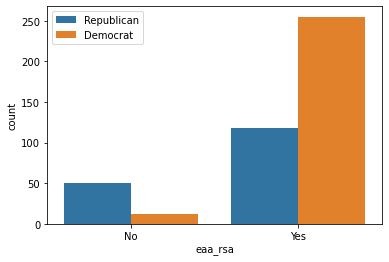

In [31]:
for col in col_graf:
    plt.figure()
    sns.countplot(x=col, hue='party', data=data)
    plt.xticks([0,1],['No','Yes'])
    plt.legend(['Republican','Democrat'])

Despues de visualizar un EDA simple de los datos procedemos a ajustar un modelo en este caso utilizaremos el modelo de **k-Nearest Neighbors**

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#creamos dos variables y que contiene lavariable a predecir (party) y X las caracteristicas
y = data['party']
X = data.drop('party', axis=1).values

#creamos un k-Nearest Neighbors con 6 Neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

#ajustadmos el clasificador a los datos
knn.fit(X, y)

# predecimos las etiquetas de los datos de entrenamiento X
y_pred = knn.predict(X)

# creamos un registro falso para obtener una prediccion (prueba)
X_new = X[1].reshape(1,-1)

# Predecimos e imprimimos la etiqueta para el nuevo punto de datos X_nuevo
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))


Prediction: ['republican']
